# Scanning binding energy and rates parameters for adaptable circuits

In [276]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.style.use('seaborn-v0_8-dark-palette')
import seaborn as sns
import pandas as pd
import numpy as np
from bioreaction.simulation.basic_sim import basic_de_sim, convert_model, BasicSimParams, BasicSimState
from bioreaction.model.data_tools import construct_model_fromnames

from copy import deepcopy
import os
import sys

if __package__ is None:

    module_path = os.path.abspath(os.path.join('..'))
    sys.path.append(module_path)

    __package__ = os.path.basename(module_path)

from tests.shared import five_circuits, CONFIG

config = deepcopy(CONFIG)

In [277]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [278]:
num_species = 3
# num_boundspecies = np.math.factorial(3)
signal_species = 0
a = [1, 1, 1]
d = [1, 1, 1]
ka = [4, 1, 1]
kd = [1, 1, 2]

model = construct_model_fromnames([str(i) for i in range(num_species)])
model.species


[Species: ('0', '0'),
 Species: ('0', '1'),
 Species: ('0', '2'),
 Species: ('1', '1'),
 Species: ('1', '2'),
 Species: ('2', '2'),
 Species: 0,
 Species: 1,
 Species: 2]

In [279]:

for i, r in enumerate(model.reactions):
    if not r.input: # 0 -> RNA
        model.reactions[i].forward_rate = a[model.species[-num_species:].index(r.output[0])]
        model.reactions[i].reverse_rate = 0
    elif not r.output: # RNA -> 0
        model.reactions[i].forward_rate = d[model.species[-num_species:].index(r.input[0])]
        model.reactions[i].reverse_rate = 0
    else:
        model.reactions[i].forward_rate = ka[model.species[-num_species:].index(r.input[0])]
        model.reactions[i].reverse_rate = kd[model.species[-num_species:].index(r.input[0])]

sim_model = convert_model(model)
params = BasicSimParams(delta_t=0.01, total_time=100)

In [280]:
s0 = np.concatenate([np.zeros(len(model.species[:-num_species])), [1, 1, 1]])
starting_state = BasicSimState(concentrations=s0)

state = basic_de_sim(starting_state=starting_state, model=sim_model, params=params)
results_species = np.concatenate([np.expand_dims(starting_state.concentrations, axis=0), state[1]])[:, -num_species:]
t = np.arange(params.total_time / params.delta_t) * params.delta_t


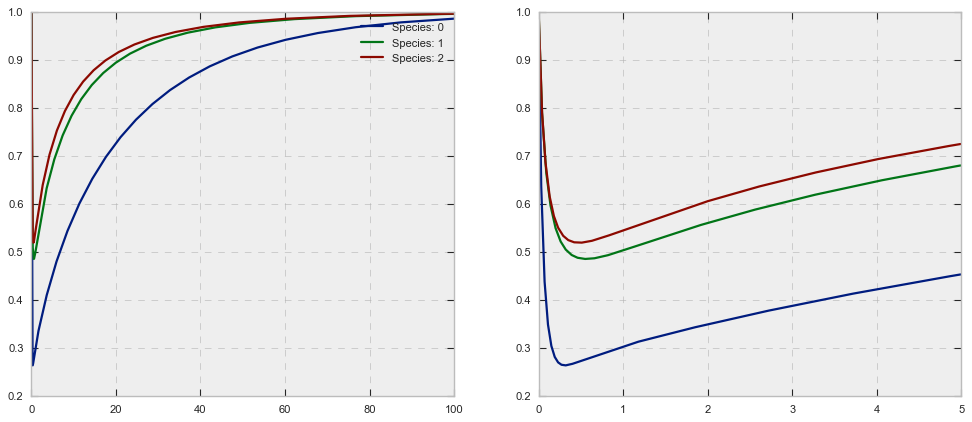

In [281]:
plt.figure(figsize=(15, 6))
ax = plt.subplot(1,2,1)
plt.plot(t, results_species)
plt.legend(model.species[-num_species:])

ax = plt.subplot(1,2,2)
till = int(5 / params.delta_t)
plt.plot(t[:till], results_species[:till, :])
